In [7]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), '../..'))
	print(os.getcwd())
except:
	pass


/home/suzumura


In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import os



path = '/home/suzumura/GIT/code/mall_customers/'

df = pd.read_csv(path + "Mall_Customers.csv",
                 encoding="UTF-8")

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:

df.tail()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [10]:

_df = df
_df = _df.replace("Male", 0)
_df = _df.replace("Female", 1)
# データの雰囲気をつかむ
_df.describe()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.560000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,1.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


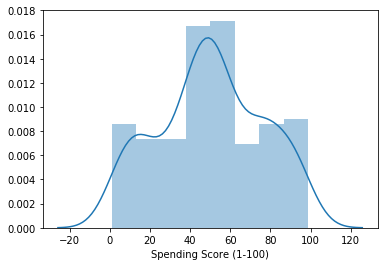

In [11]:
sns.distplot(df['Spending Score (1-100)'])


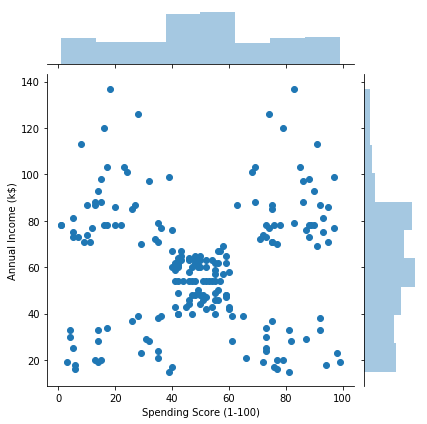

In [12]:
sns.jointplot(x='Spending Score (1-100)', y='Annual Income (k$)', data=df)


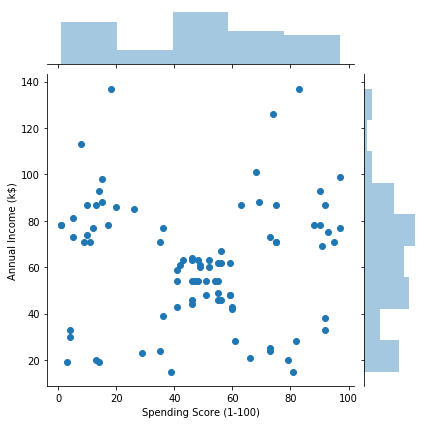

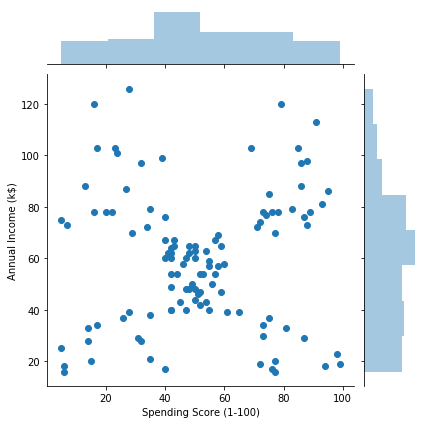

In [13]:
man = df[df["Gender"] == "Male"]
sns.jointplot(x='Spending Score (1-100)', y='Annual Income (k$)', data=man)

woman = df[df["Gender"] == "Female"]
sns.jointplot(x='Spending Score (1-100)', y='Annual Income (k$)', data=woman)


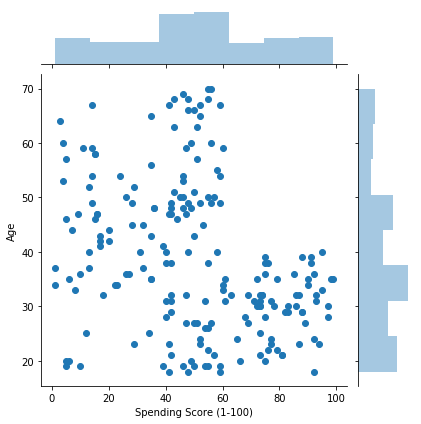

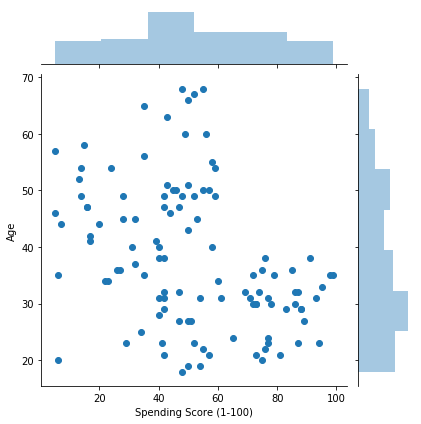

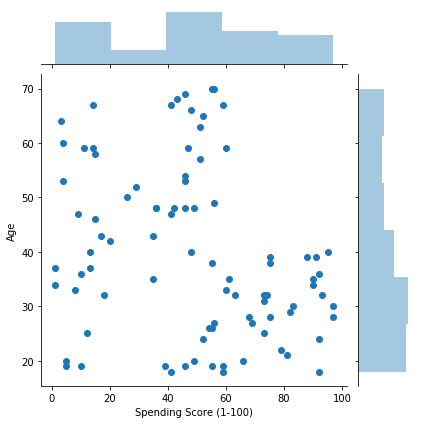

In [14]:
sns.jointplot(x='Spending Score (1-100)', y='Age', data=df)
sns.jointplot(x='Spending Score (1-100)', y='Age', data=woman)
sns.jointplot(x='Spending Score (1-100)', y='Age', data=man)



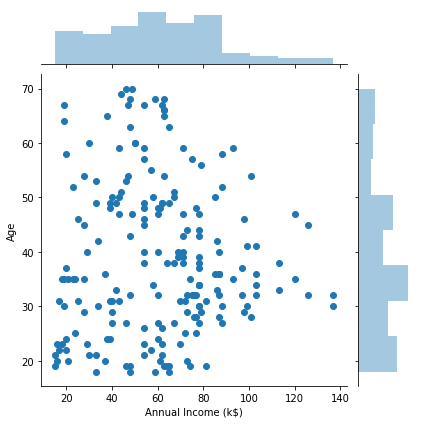

In [15]:
sns.jointplot(x='Annual Income (k$)', y='Age', data=df)



In [16]:
def clustering(k, df):
    _df = df.replace("Male", 0)
    _df = _df.replace("Female", 1)
    pred = KMeans(n_clusters=k).fit_predict(_df)
    _df['cluster_id'] = pred

    sns.relplot(x='Spending Score (1-100)',
                y='Annual Income (k$)', data=_df,
                col="Gender", hue='cluster_id')


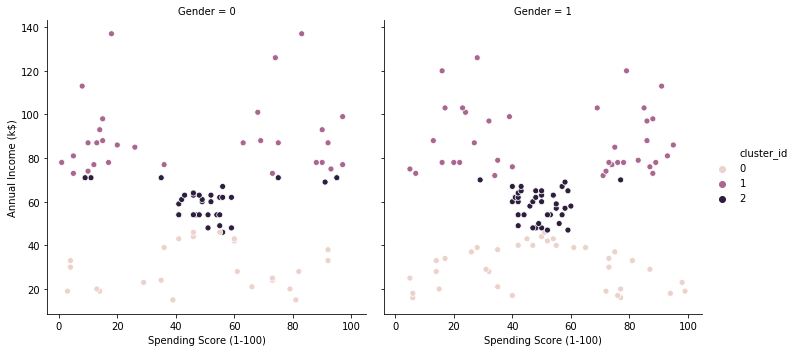

In [17]:
clustering(3, df)

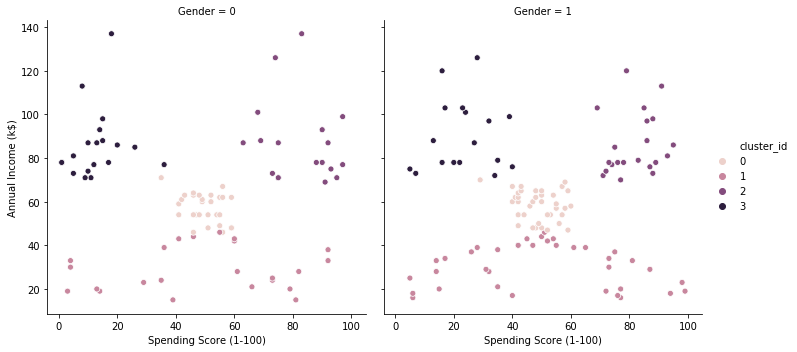

In [18]:
clustering(4, df)

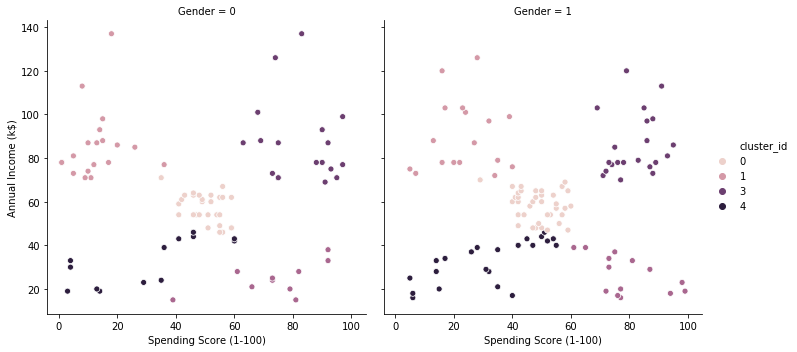

In [19]:
clustering(5, df)